In [102]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


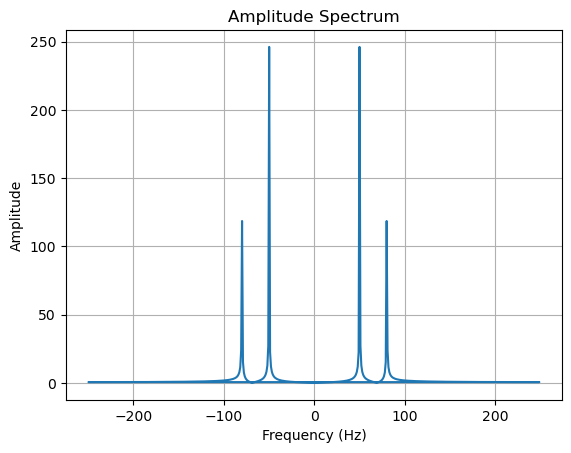

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# 生成示例信号
t = np.linspace(0, 1, 500)  # 1秒内500个采样点
x = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 80 * t)  # 混合信号，包含50Hz和80Hz成分

# 执行傅立叶变换
X = np.fft.fft(x)
freqs = np.fft.fftfreq(len(x), d=t[1] - t[0])

# 计算幅度谱
amplitude_spectrum = np.abs(X)

# 绘制频谱图
plt.plot(freqs, amplitude_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum')
plt.grid()
plt.show()


In [104]:
# model
import pca_koopman_dir as km
import torch

# Device
device = 'cpu'
print('Device:', device)

x_dataset, u_dataset = load_dataset_from_files(config)

Device: cpu


(342, 68)


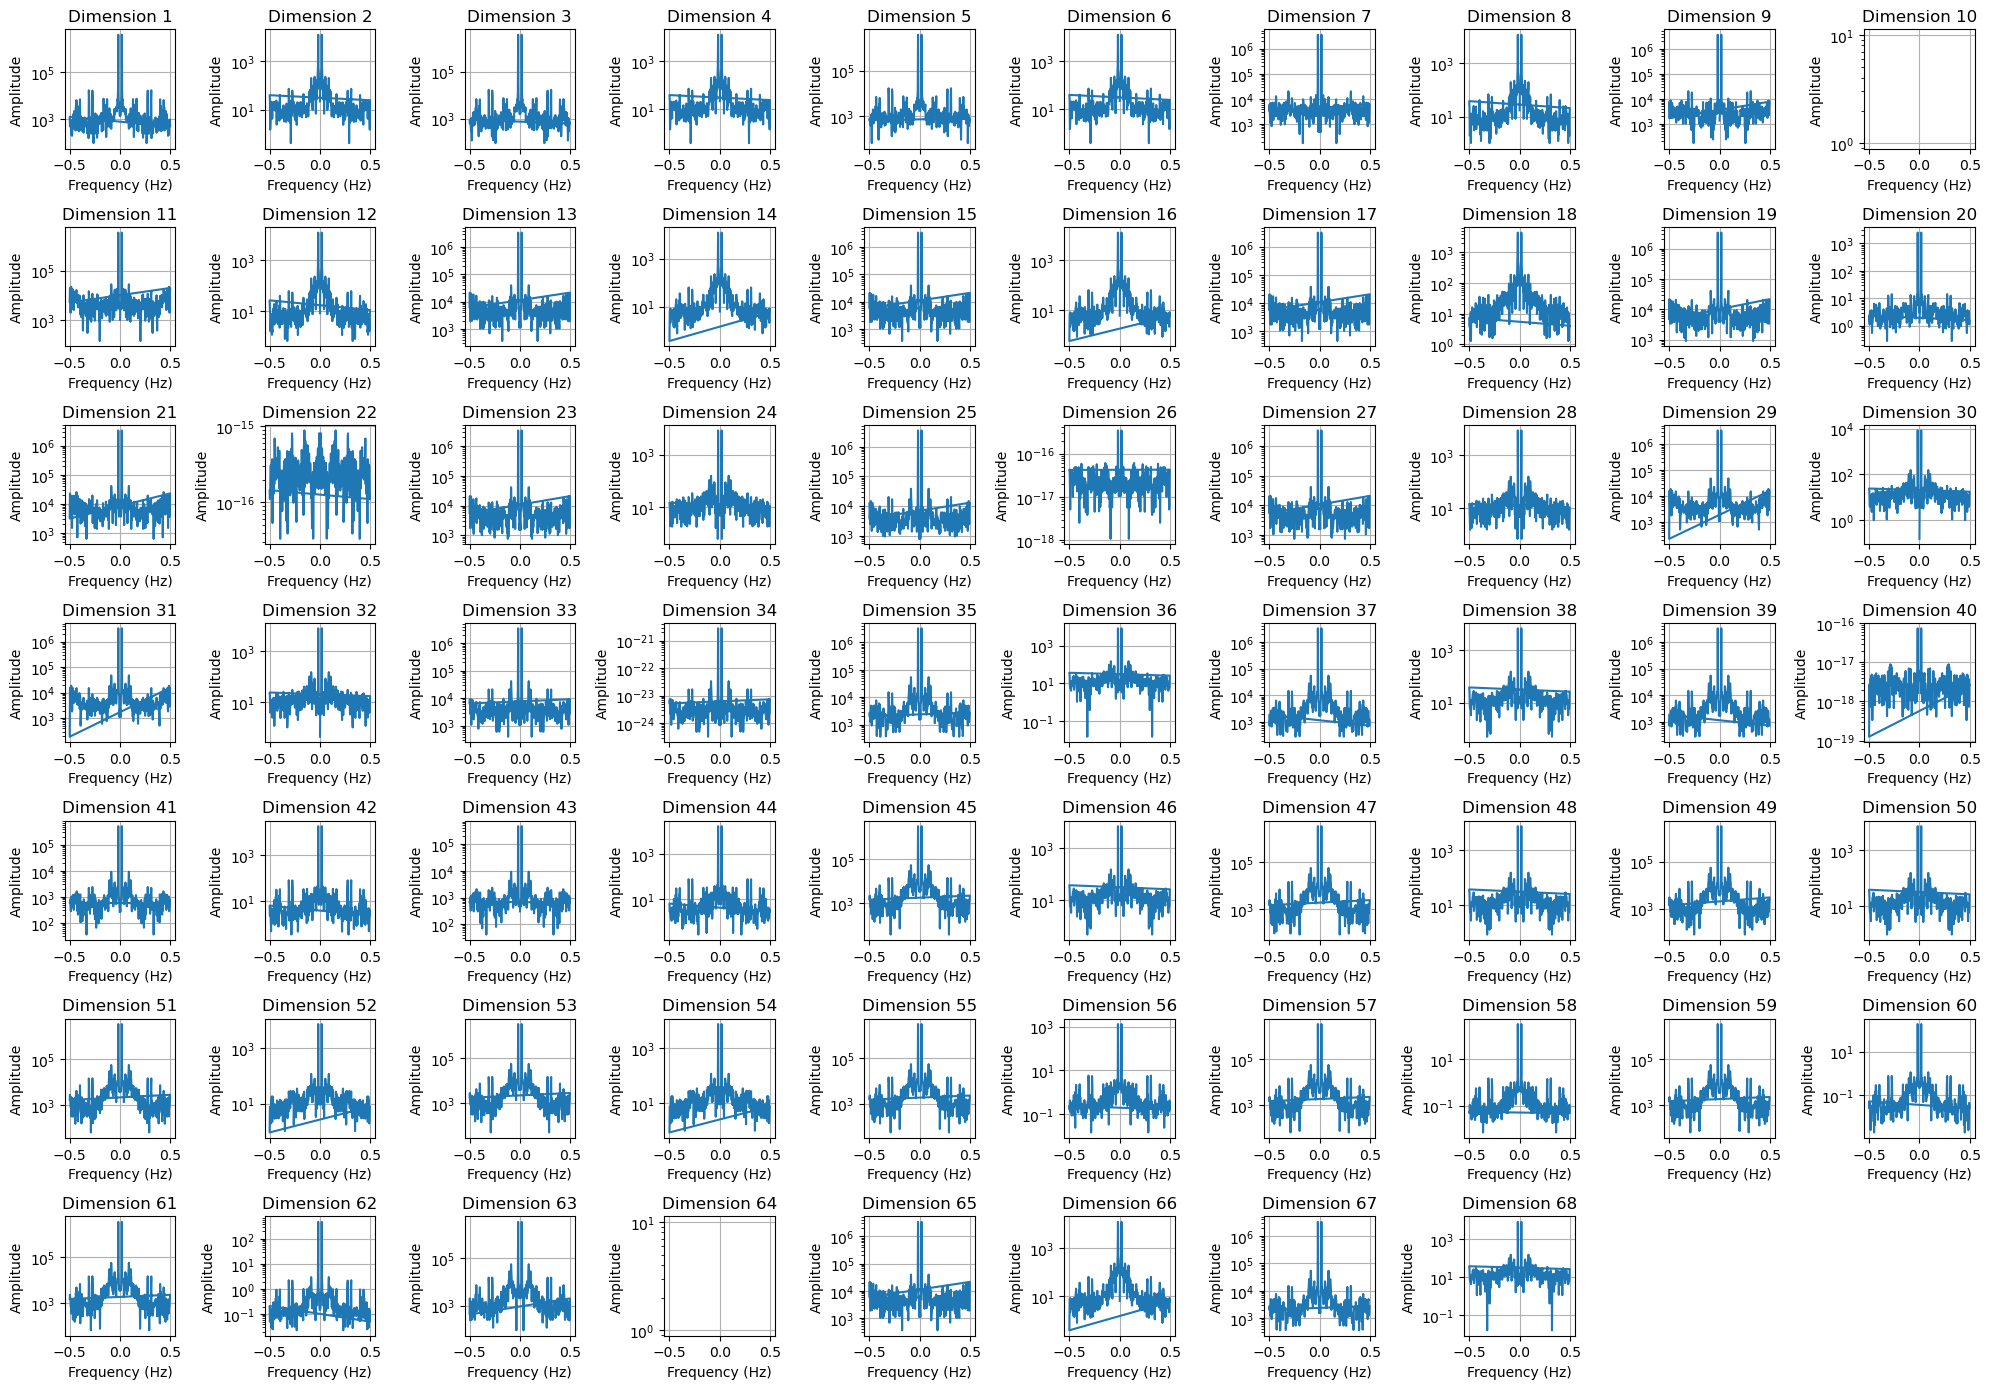

In [105]:
import numpy as np
import matplotlib.pyplot as plt

x_data = x_dataset[20][::10, :]

print(x_data.shape)  # (3417, 68)

# 对每个维度进行傅立叶变换
fft_data = np.fft.fft(x_data, axis=0)

# 计算频率分量
freqs = np.fft.fftfreq(x_data.shape[0])

# 计算幅度谱
amplitude_spectrum = np.abs(fft_data)

# 绘制68个频谱图，每行10个
fig, axes = plt.subplots(nrows=7, ncols=10, figsize=(20, 14))
axes = axes.flatten()  # 将axes展平，方便索引

for i in range(68):
    ax = axes[i]
    ax.plot(freqs, amplitude_spectrum[:, i])
    # print(np.max(freqs))
    ax.set_title(f'Dimension {i+1}')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    ax.set_yscale('log')
    ax.grid()

# 删除多余的子图
for i in range(68, 70):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

(342, 68)


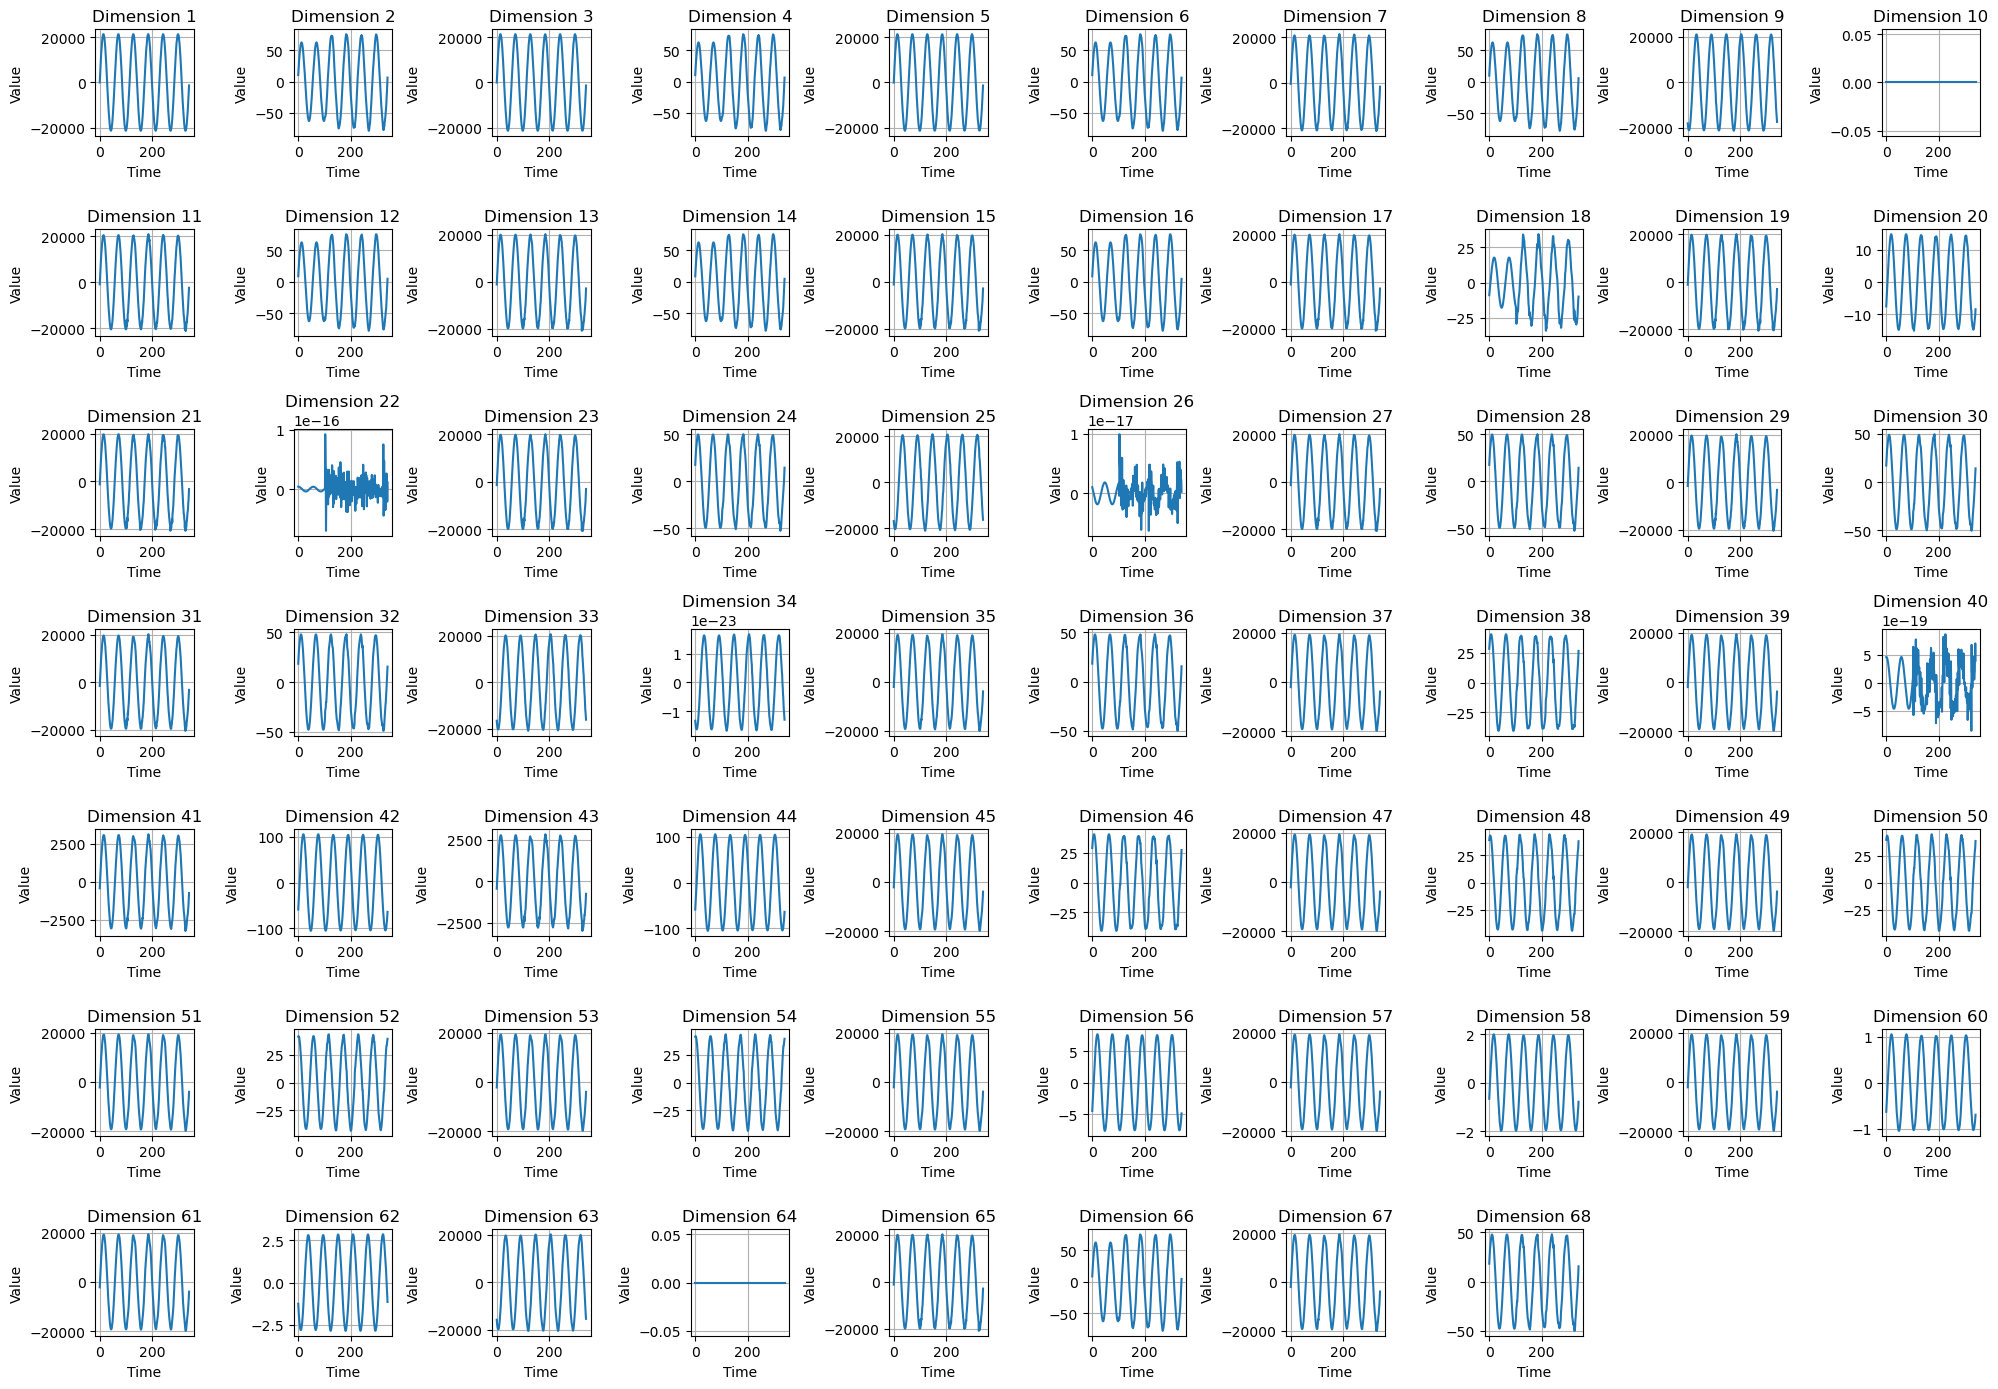

In [107]:
fig, axes = plt.subplots(nrows=7, ncols=10, figsize=(20, 14))
axes = axes.flatten()  # 将axes展平，方便索引
print(x_data.shape)
for i in range(68):
    ax = axes[i]
    ax.plot(x_data[:, i])
    ax.set_title(f'Dimension {i+1}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.grid()

# 删除多余的子图
for i in range(68, 70):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



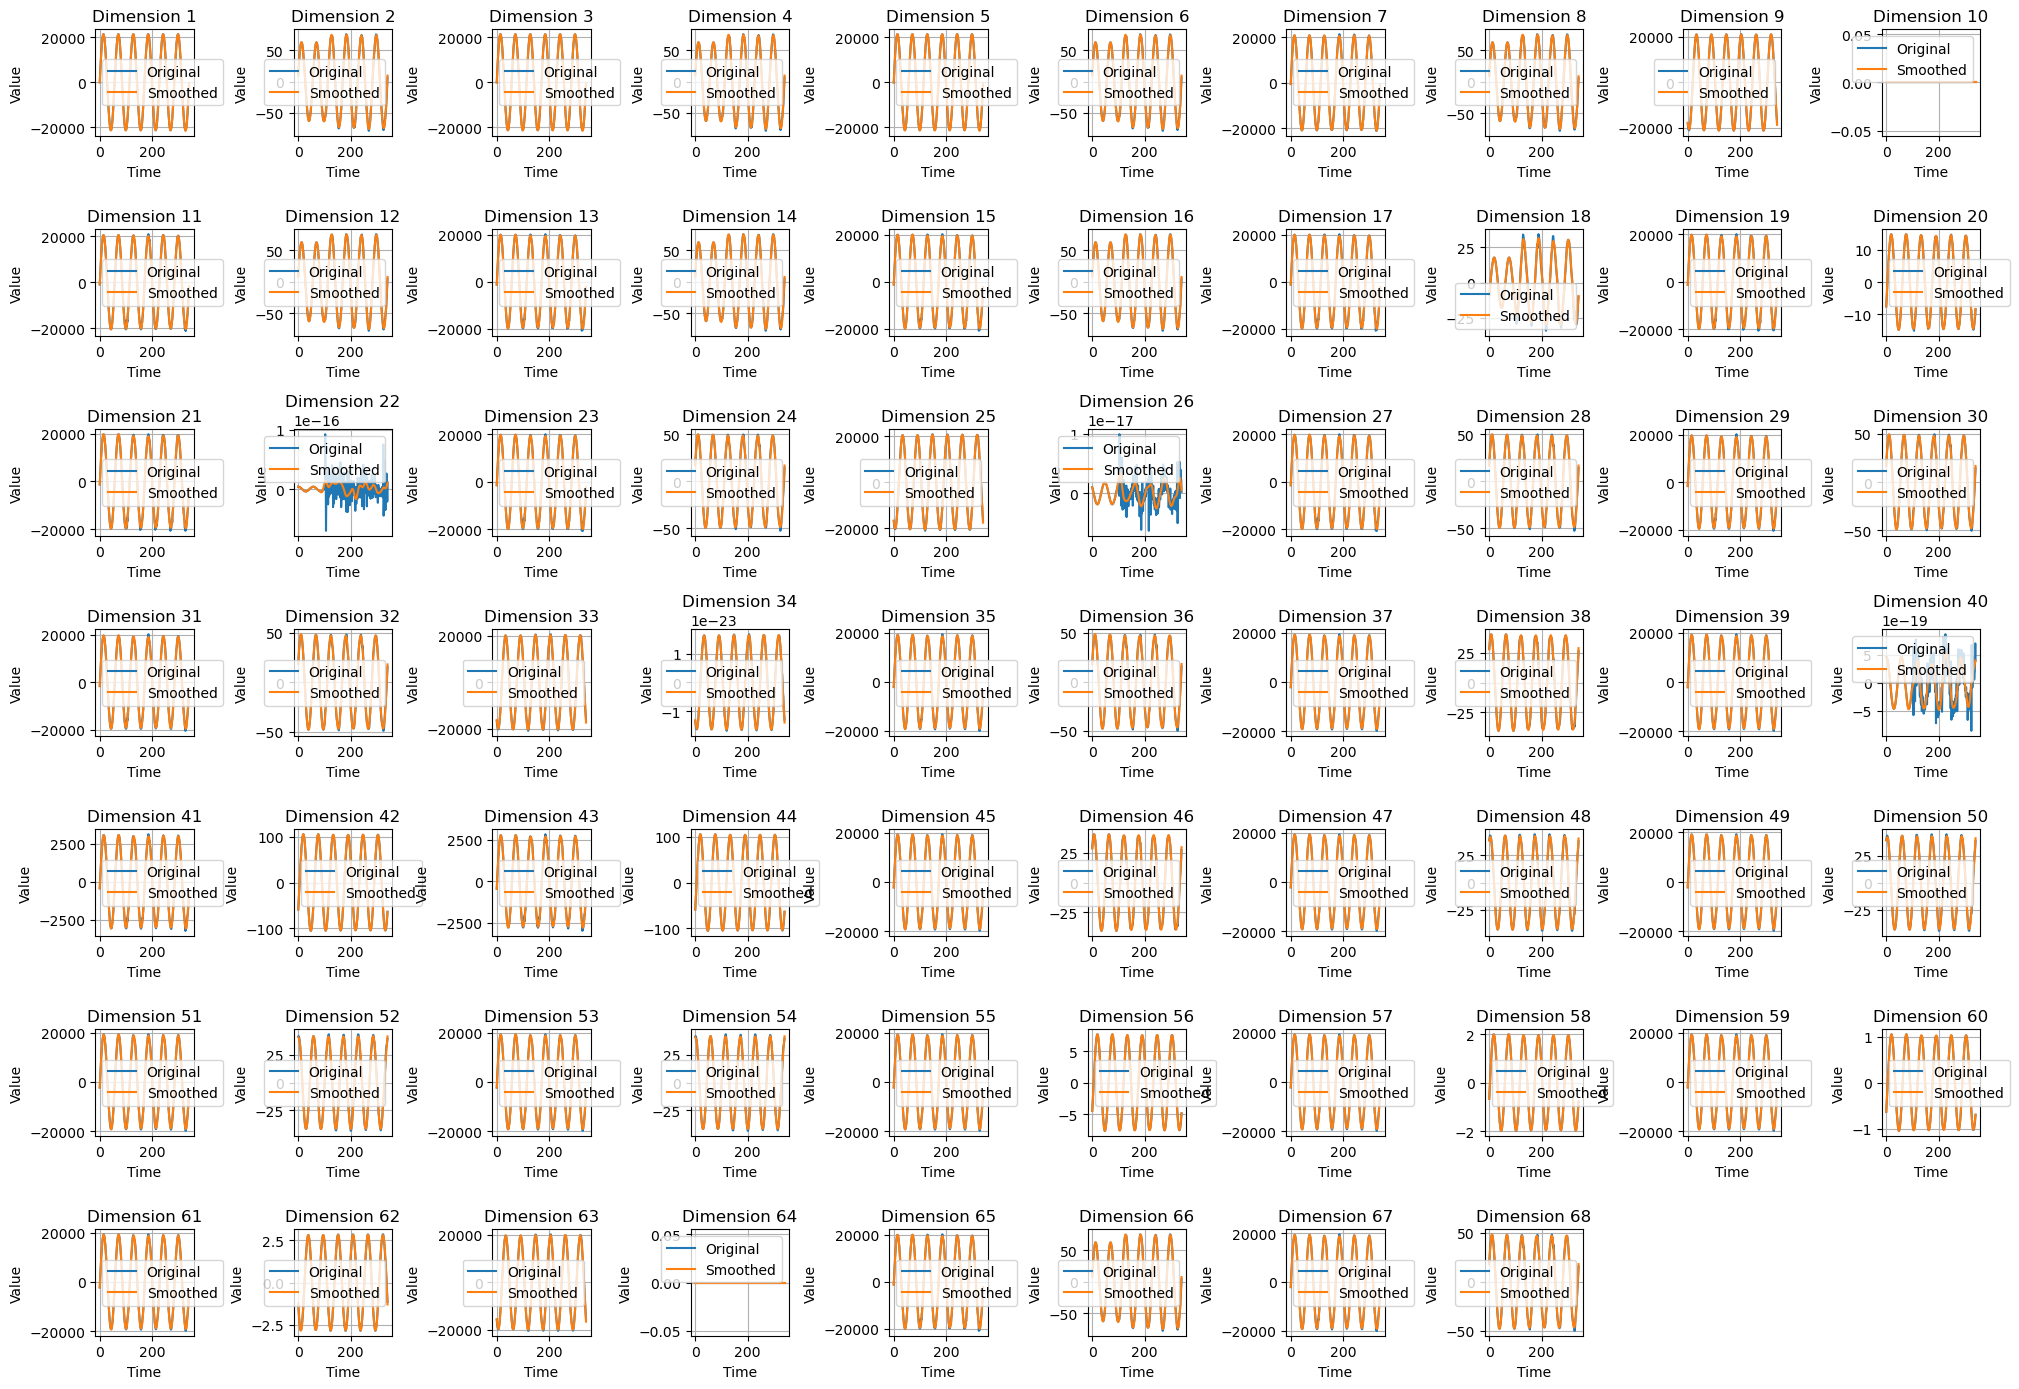

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# 定义Butterworth低通滤波器
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# 应用低通滤波器
def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data, axis=0)
    return y

# x_data = x_dataset[20]

# 滤波参数
cutoff = 0.05  # 截止频率，需根据实际情况调整
fs = 1  # 采样频率，需根据实际情况调整
order = 5  # 滤波器阶数

# 应用低通滤波器
smoothed_data = lowpass_filter(x_data, cutoff, fs, order)

# 绘制平滑前后的数据对比
fig, axes = plt.subplots(nrows=7, ncols=10, figsize=(20, 14))
axes = axes.flatten()

for i in range(68):
    ax = axes[i]
    ax.plot(x_data[:, i], label='Original')
    ax.plot(smoothed_data[:, i], label='Smoothed')
    ax.set_title(f'Dimension {i+1}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid()

for i in range(68, 70):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [140]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
print(x_data.shape)
scaler = StandardScaler()
x_data_scaled = scaler.fit_transform(x_data)
smoothed_data_scaled = scaler.transform(smoothed_data)

# 使用PCA进行降维处理
pca = PCA(n_components=10)
pca.fit(x_data_scaled)

# 对标准化后的原始数据和平滑数据应用PCA变换
x_data_pca = pca.transform(x_data_scaled)
smoothed_data_pca = pca.transform(smoothed_data_scaled)

(342, 68)


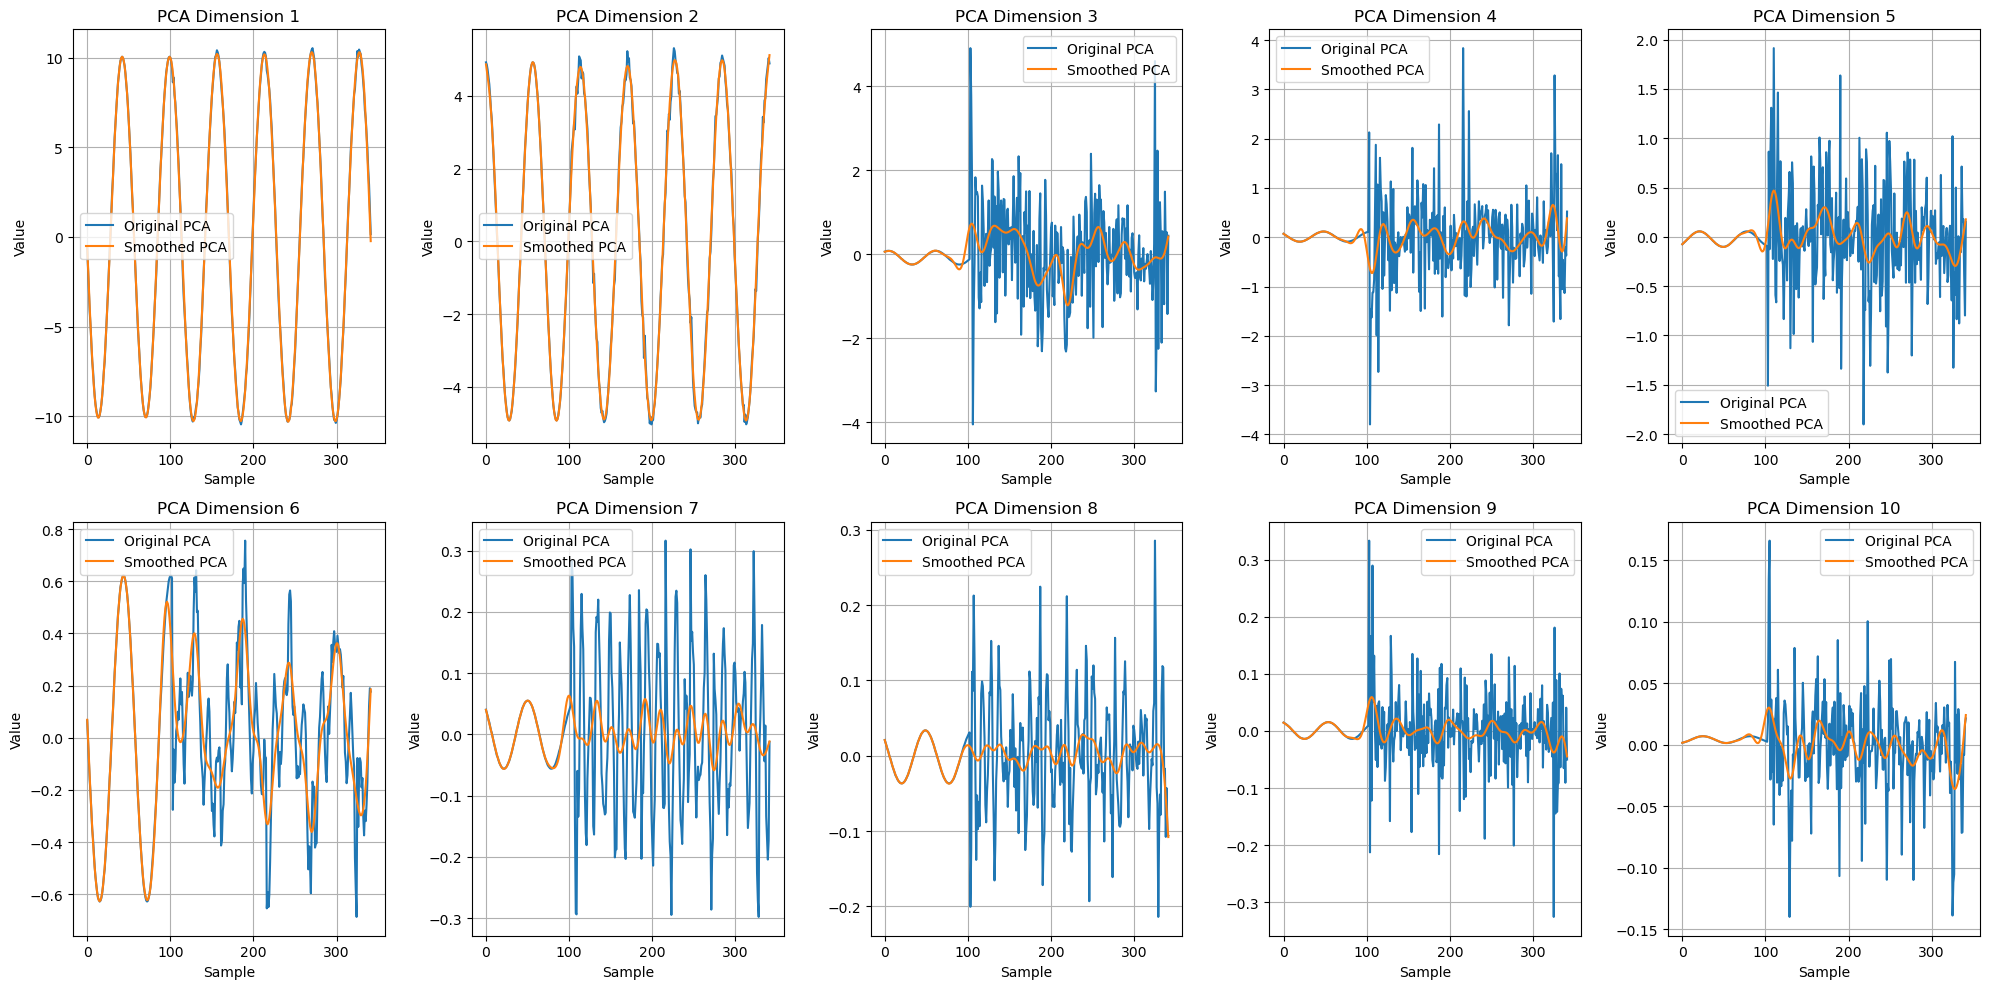

In [141]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = axes.flatten()
for i in range(10):
    ax = axes[i]
    ax.plot(x_data_pca[:, i], label='Original PCA')
    ax.plot(smoothed_data_pca[:, i], label='Smoothed PCA')
    ax.set_title(f'PCA Dimension {i+1}')
    ax.set_xlabel('Sample')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

In [142]:
print(x_data_pca.shape)  # (500, 10)

(342, 10)
